In [ ]:
!pip install qiskit
!wget https://qulacs-quantum-datasets.s3.us-west-1.amazonaws.com/base_test_mnist_784_f90.zip
!unzip base_test_mnist_784_f90.zip
!pip install qiskit qiskit-aer matplotlib numpy

--2025-04-28 15:43:20--  https://qulacs-quantum-datasets.s3.us-west-1.amazonaws.com/base_test_mnist_784_f90.zip
Resolving qulacs-quantum-datasets.s3.us-west-1.amazonaws.com (qulacs-quantum-datasets.s3.us-west-1.amazonaws.com)... 3.5.162.101, 52.219.194.130, 52.219.121.34, ...
Connecting to qulacs-quantum-datasets.s3.us-west-1.amazonaws.com (qulacs-quantum-datasets.s3.us-west-1.amazonaws.com)|3.5.162.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82215771 (78M) [application/zip]
Saving to: ‘base_test_mnist_784_f90.zip.1’

base_test_mnist_784 100%[===================>]  78.41M  8.82MB/s    in 10s     

2025-04-28 15:43:32 (7.61 MB/s) - ‘base_test_mnist_784_f90.zip.1’ saved [82215771/82215771]

Archive:  base_test_mnist_784_f90.zip
replace base_test_mnist_784_f90/state/164? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

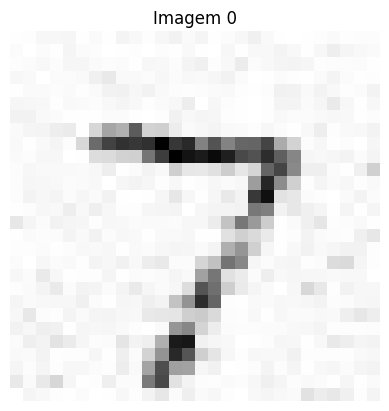

Fidelidade da imagem 0: 0.000001


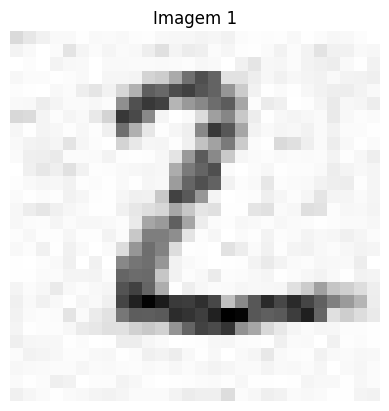

Fidelidade da imagem 1: 0.000989


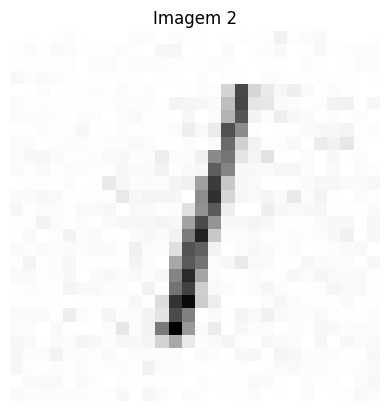

Fidelidade da imagem 2: 0.000000


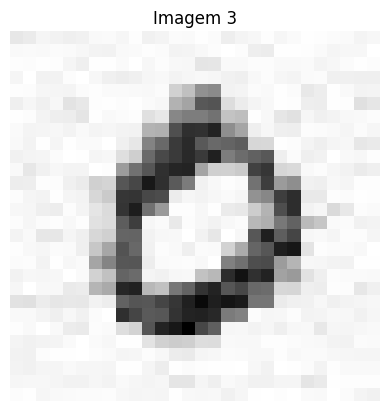

Fidelidade da imagem 3: 0.000344


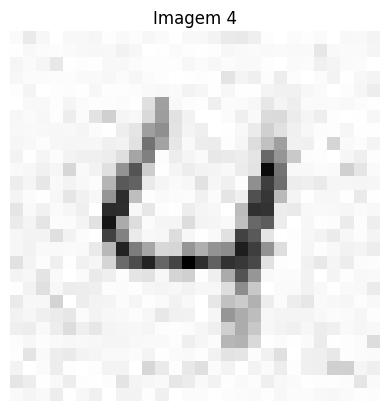

Fidelidade da imagem 4: 0.000039


In [ ]:
import matplotlib
from qiskit.quantum_info import state_fidelity, Statevector
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

path = "base_test_mnist_784_f90/qasm/"

def show_figure(pict: np.array, index=0, fidelity=None):
    plt.imshow(pict.reshape(28, 28), cmap="Greys")
    plt.axis('off')
    title = f"Imagem {index}"
    if fidelity is not None:
        title += f" - Fidelidade: {fidelity:.6f}"
    plt.title(f"Imagem {index}")
    plt.show()
    plt.close()

def show_state_figure(state, index=0, fidelity=None):
    state_np = np.array(state)
    pict = np.abs(state_np[:784])
    show_figure(pict, index=index, fidelity=fidelity)

simulator = AerSimulator(method='statevector')

for i in range(5):
    with open(path + str(i)) as f:
        qasm = f.read()
        qc = QuantumCircuit.from_qasm_str(qasm)
        
        qc.save_statevector()
        
        compiled_circuit = transpile(qc, simulator)
        job = simulator.run(compiled_circuit)
        result = job.result()
        
        state = result.data(0)['statevector'] 
        state_sv = Statevector(state)

        reference_state = np.zeros(state.dim, dtype=complex)
        reference_state[0] = 1.0

        fidelity = state_fidelity(state_sv, reference_state)

        show_state_figure(state_sv, index=i, fidelity=fidelity)
        print(f"Fidelidade da imagem {i}: {fidelity:.6f}")

In [2]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger


In [3]:
# Para carregar MNSIQ:
# from quantumnet.components.simulation_qml import QuantumDatasetLoader
# loader = QuantumDatasetLoader(dataset_name="mnisq", num_images=50)
# loader.carregar()

# # Para acessar os circuitos e labels:
# circuits = loader.X_train
# labels = loader.y_train


Hosts inicializados
Canais inicializados
Pares EPRs adicionados


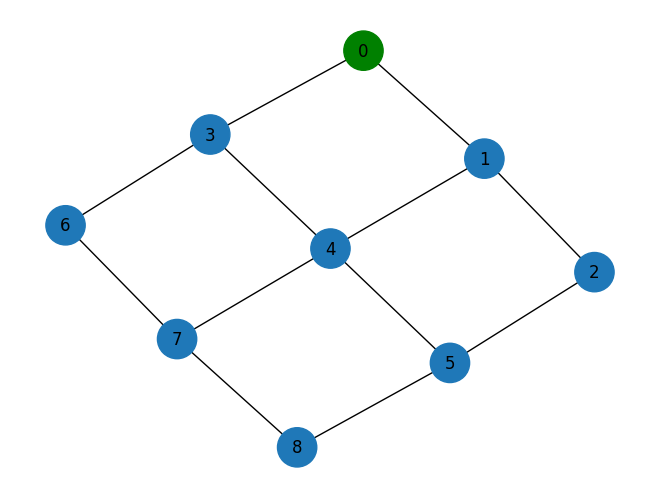

In [4]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

2025-04-28 15:01:47,603: Timeslot 0: Iniciando protocolo Andrew Childs entre Alice 6 e Bob 0.
2025-04-28 15:01:47,605: Limpando a memória do cliente (Alice) antes de iniciar o protocolo.
2025-04-28 15:01:47,609: Limpando a memória do servidor (Bob) antes de iniciar o protocolo.
2025-04-28 15:01:47,611: Cliente criou 4 qubits para a transmissão.
2025-04-28 15:01:47,613: Qubit 468 registrado no timeslot 0
2025-04-28 15:01:47,617: Qubit 490 registrado no timeslot 0
2025-04-28 15:01:47,618: Qubit 121 registrado no timeslot 0
2025-04-28 15:01:47,620: Qubit 390 registrado no timeslot 0
2025-04-28 15:01:47,622: Qubit 468 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-28 15:01:47,622: Qubit 490 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-28 15:01:47,623: Qubit 121 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-28 15:01:47,624: Qubit 390 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-28 15:01:47,625: Alice recebeu 4 qubits. Total: 4 qubits na memória.
2025-04-28 15:01:47,626: Instruç

Iniciando treinamento QCNN...
Qubits finais no circuito QCNN: 4
Acurácia no teste QCNN: 100.0%
Acurácia no treino QCNN: 100.0%


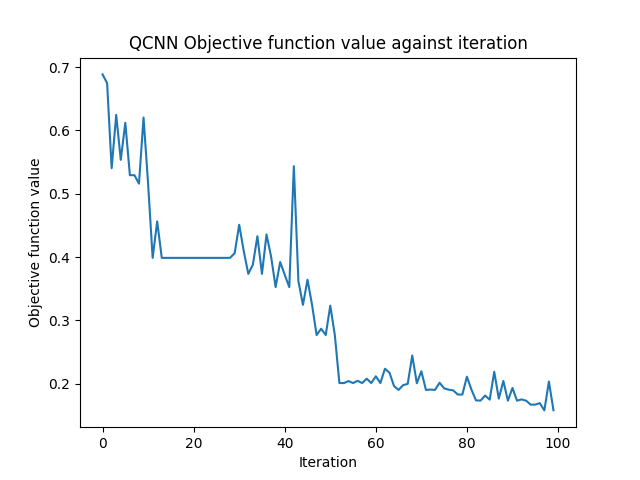

2025-04-28 15:02:31,627: Timeslot 6: Servidor aplicando operações nos qubits.
2025-04-28 15:02:31,627: Timeslot 7: Servidor aplicando operações nos qubits.
2025-04-28 15:02:31,628: Timeslot 8: Servidor aplicando operações nos qubits.
2025-04-28 15:02:31,628: Timeslot 9: Servidor aplicando operações nos qubits.
2025-04-28 15:02:31,629: Servidor aplicou as operações instruídas pelo Cliente nos qubits.
2025-04-28 15:02:31,630: Qubit 468 após operações de Servidor - Estado: 1, Fase: -1
2025-04-28 15:02:31,630: Qubit 490 após operações de Servidor - Estado: 0, Fase: 1
2025-04-28 15:02:31,630: Qubit 121 após operações de Servidor - Estado: 0, Fase: 1
2025-04-28 15:02:31,631: Qubit 390 após operações de Servidor - Estado: 1, Fase: 1
2025-04-28 15:02:31,631: Limpando a memória do cliente antes de receber os qubits devolvidos.
2025-04-28 15:02:31,632: Usando a rota fornecida: [0, 3, 6]
2025-04-28 15:02:31,632: Volta: Criando 4 pares EPRs no segmento 0 -> 3.
2025-04-28 15:02:31,632: Par EPR <qua

Tempo de Operação: 4


In [5]:
# quantum_circuit, num_qubits, circuit_depth = rede.generate_random_circuit(num_qubits=4, num_gates=20)
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=4,scenario=2,circuit_depth=4,modelo_qml="qcnn")